In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, ConfusionMatrixDisplay, confusion_matrix
from sasviya.ml.tree import ForestClassifier

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

### Read Original and Synthetic Data

In [7]:
synthetic_data = pd.read_csv('../output/synthetic_data.csv')
synthetic_data['Outcome']=1
train_valid = pd.read_csv('../output/train_valid.csv')
test = pd.read_csv('../output/test_predictions.csv')
train_valid = pd.concat([train_valid, synthetic_data], axis=0).sample(frac=1)
print('Train Size:', train_valid.shape[0], '--- Diabetes Frequency:', f'{round(100*train_valid.Outcome.sum()/train_valid.shape[0],2)}%')
print('Test Size:', test.shape[0], '--- Diabetes Frequency:', f'{round(100*test.Outcome.sum()/test.shape[0],2)}%')

Train Size: 941 --- Diabetes Frequency: 52.18%
Test Size: 77 --- Diabetes Frequency: 35.06%


In [8]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
target='Outcome'

Age_encoder = LabelEncoder()
train_valid['Age']=Age_encoder.fit_transform(train_valid['Age'])
test['Age']=Age_encoder.transform(test['Age'])

### Model

In [9]:
final_viya = ForestClassifier(random_state=SEED)
final_viya.fit(train_valid[features], train_valid[target].to_numpy().astype(int))

print('Test F1 Score')
print('Without data augmentation:', round(100*f1_score(test[target], test['Viya_Pred']),2))
print('With data augmentation:', round(100*f1_score(test[target], final_viya.predict(test[features])),2))

Test F1 Score
Without data augmentation: 68.0
With data augmentation: 71.64


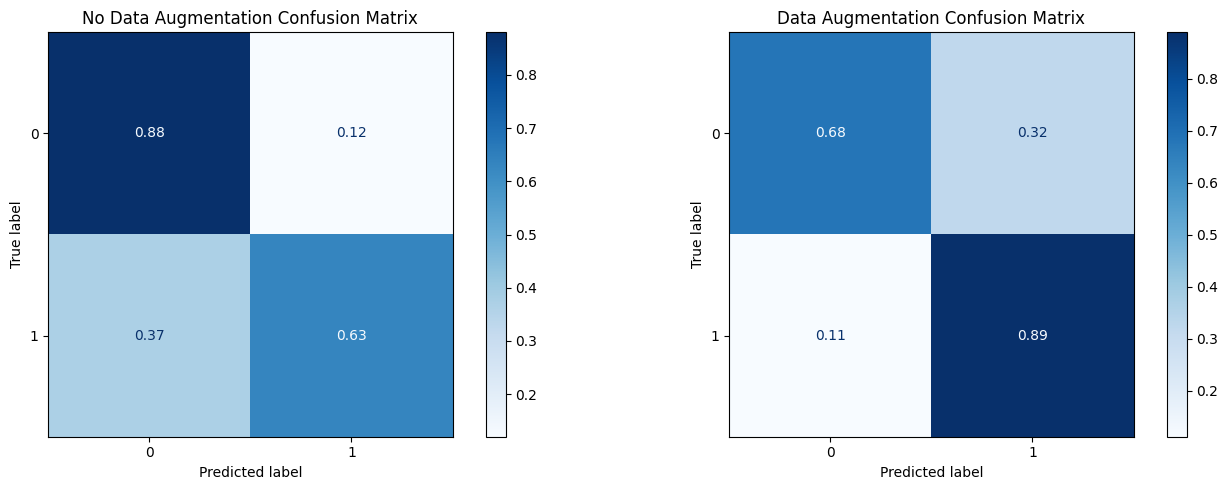

In [10]:
test['New_Viya_Preds'] = final_viya.predict(test[features])

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
axs=axs.ravel()
ax=axs[0]
disp = ConfusionMatrixDisplay(confusion_matrix(test[target], test['Viya_Pred'], normalize='true'))
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title('No Data Augmentation Confusion Matrix')

ax=axs[1]
disp = ConfusionMatrixDisplay(confusion_matrix(test[target], test['New_Viya_Preds'], normalize='true'))
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title('Data Augmentation Confusion Matrix')

plt.tight_layout()
plt.show()